#### UCI Heart Disease

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("data/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.num.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [4]:
df.drop(columns=["id"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
thalch,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2
ca,309.0,0.676375,0.935653,0.0,0.0,0.0,1.0,3.0
num,920.0,0.995652,1.142693,0.0,0.0,1.0,2.0,4.0


<Figure size 640x480 with 0 Axes>

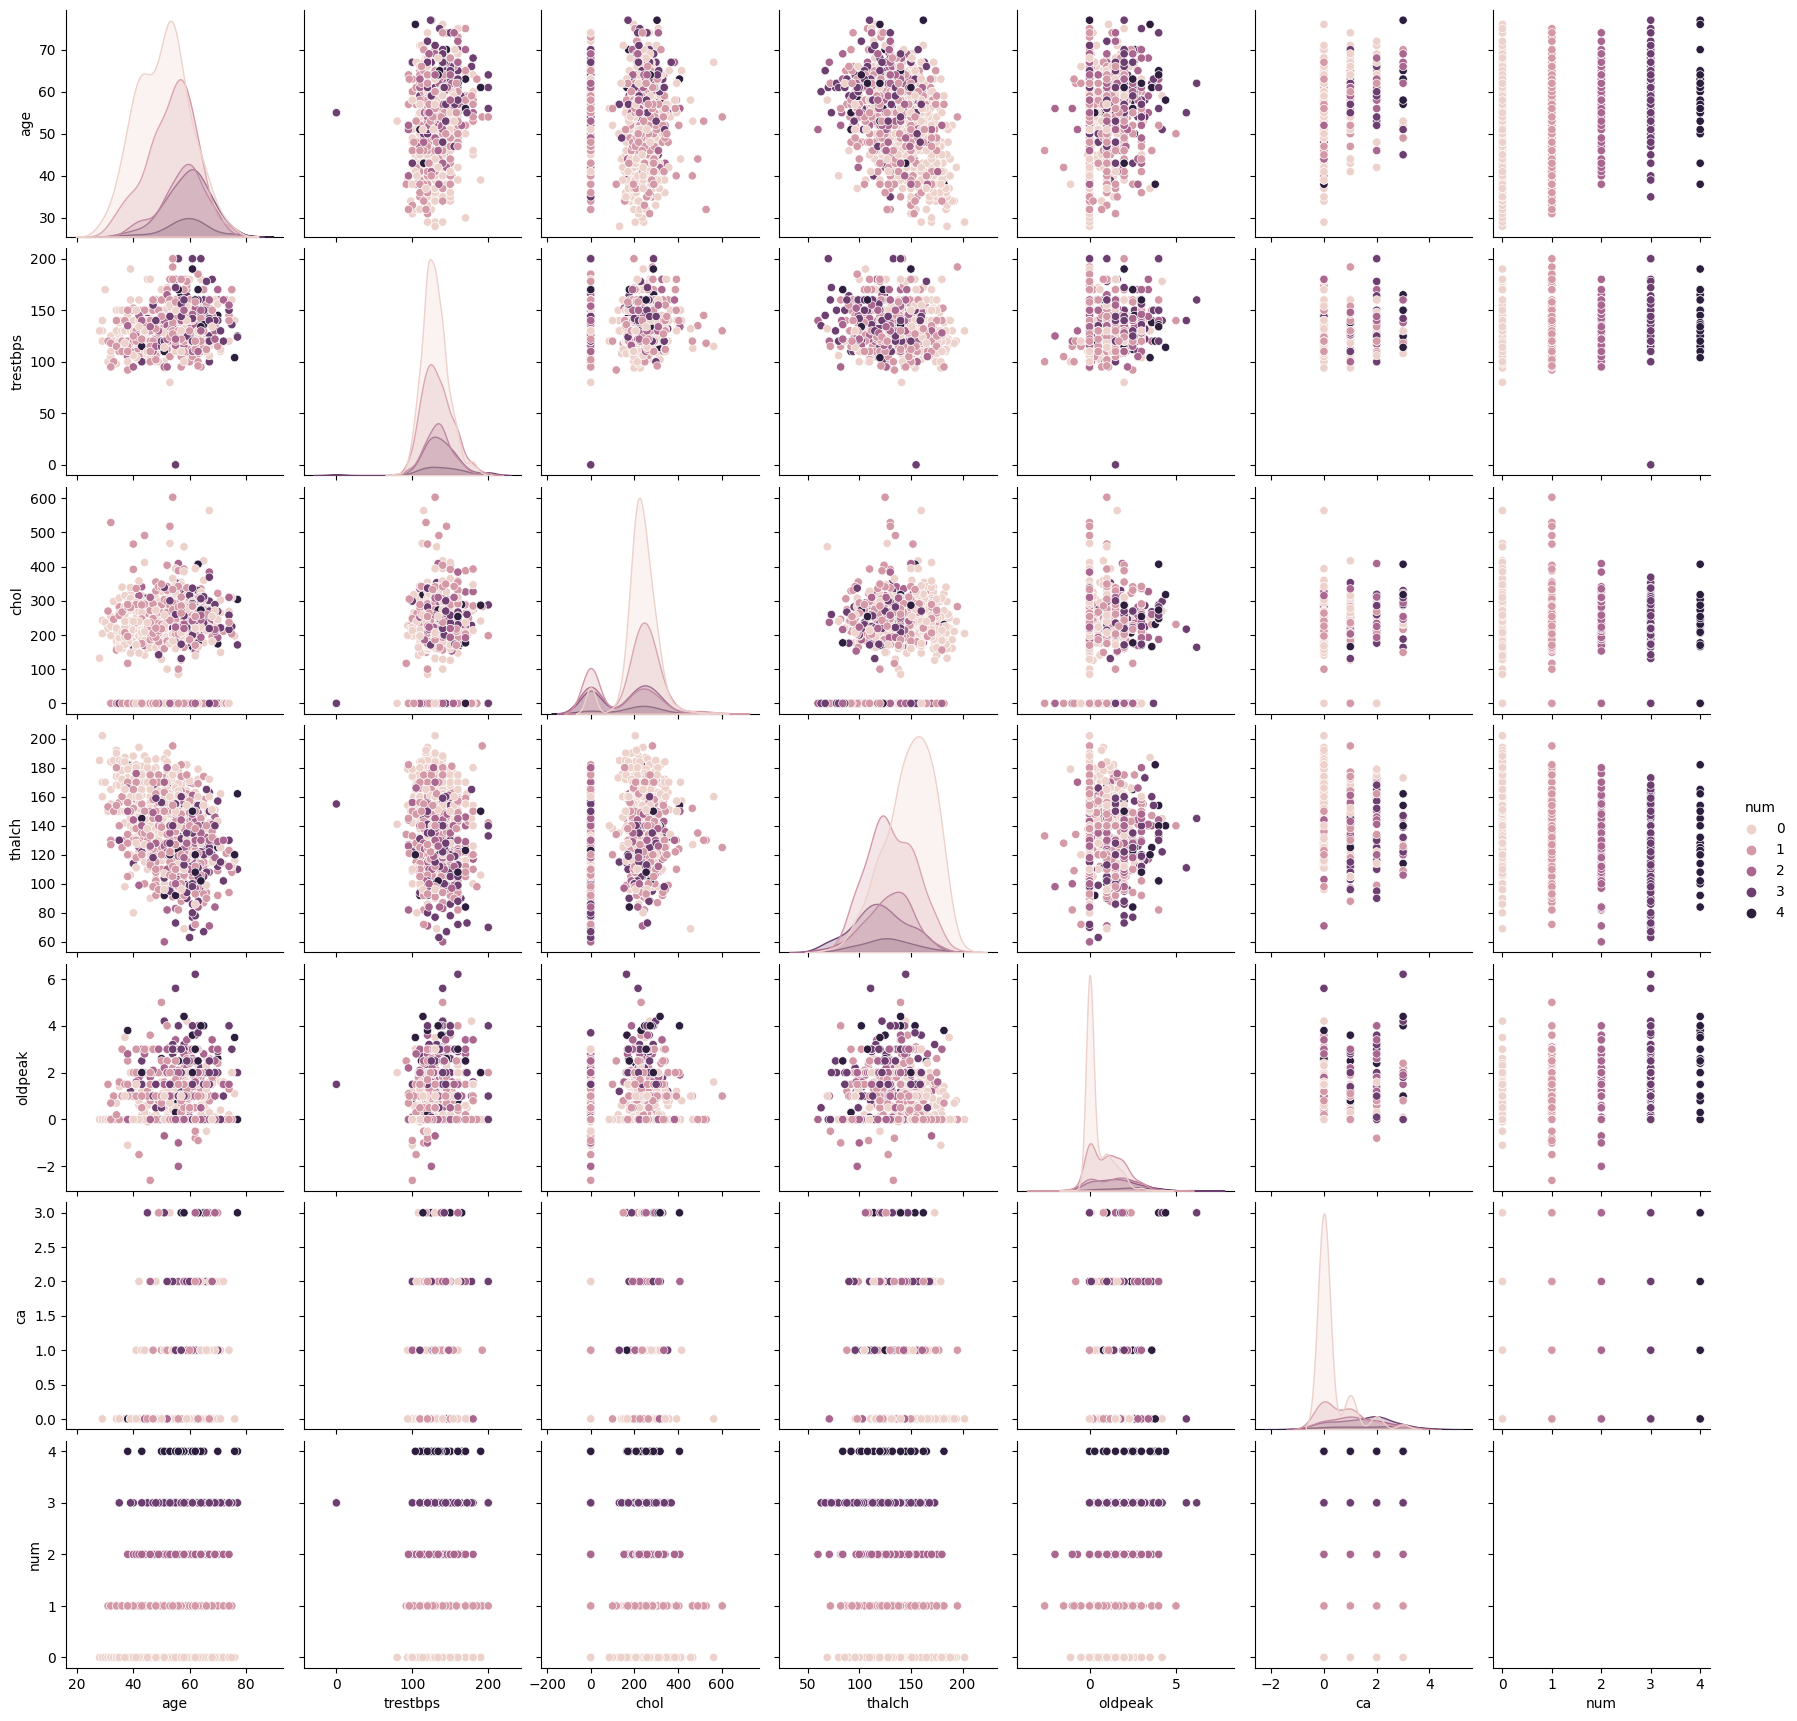

In [7]:
plt.figure()
sns.pairplot(df, vars=df.select_dtypes(include=[np.number]).columns.tolist(), hue="num")
plt.show()

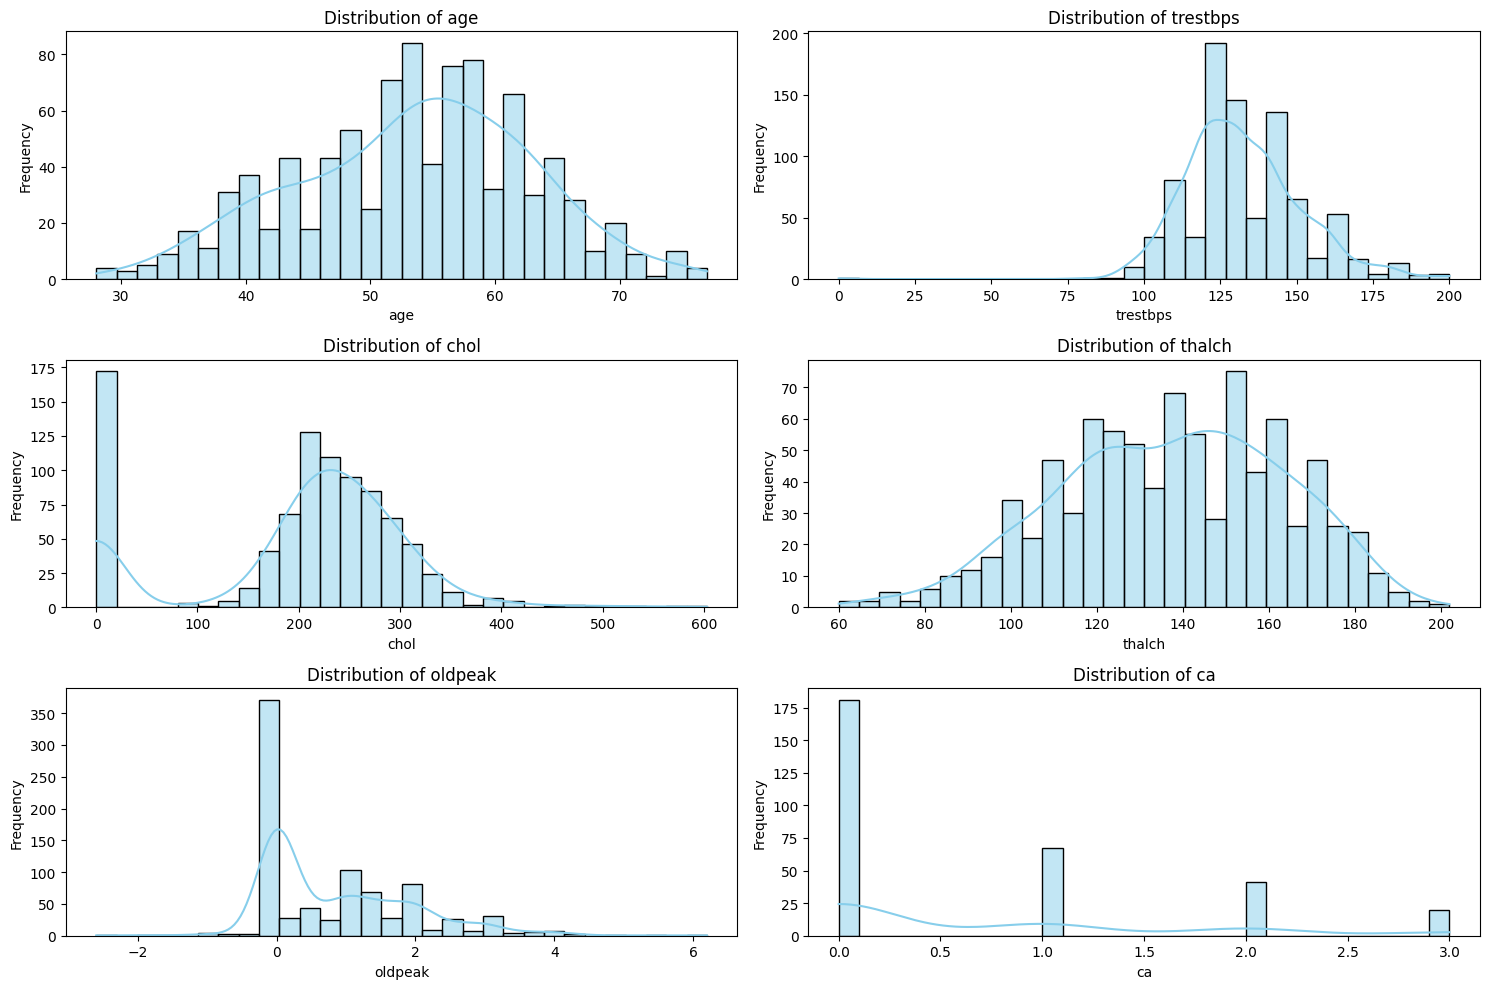

In [8]:
plt.figure(figsize=(15, 10))

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('num') 

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)  
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

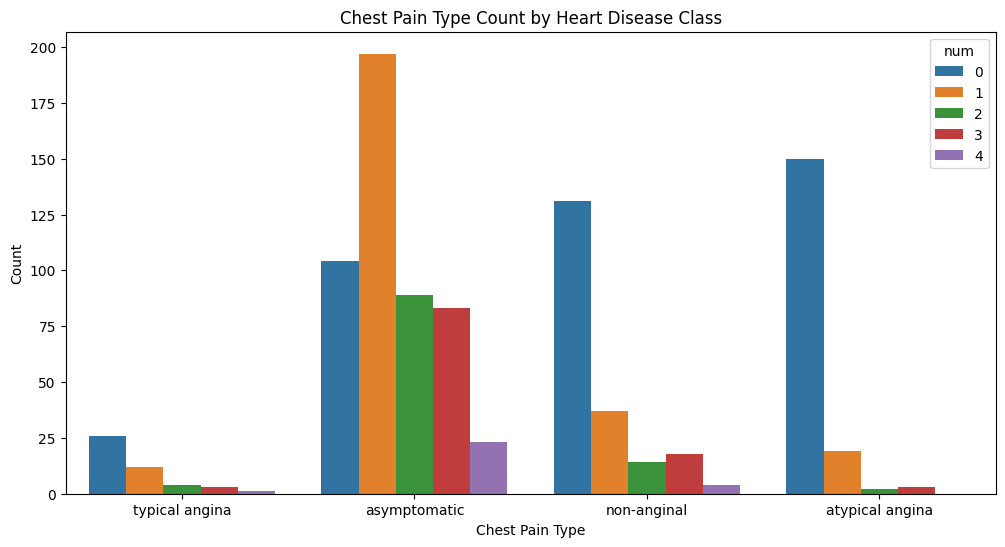

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cp', hue='num')
plt.title('Chest Pain Type Count by Heart Disease Class')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

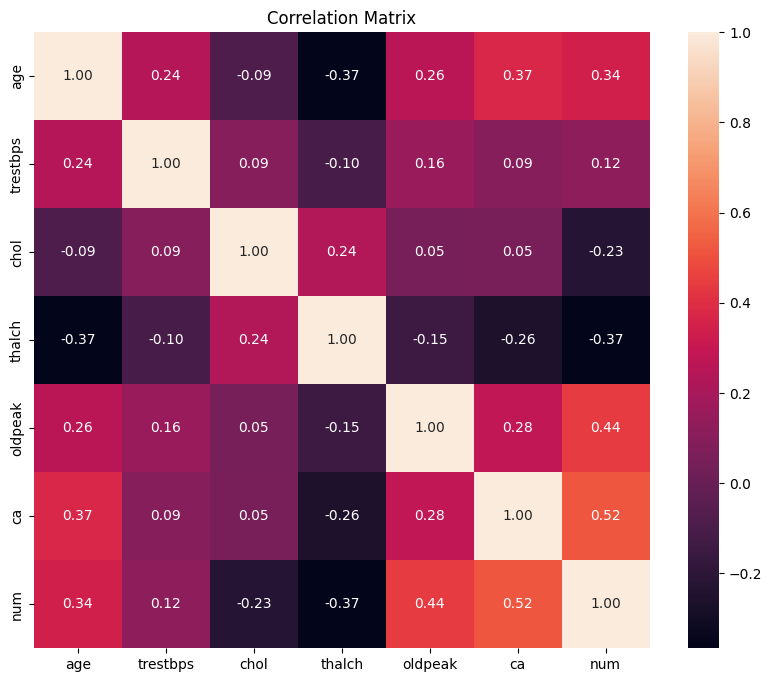

In [10]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

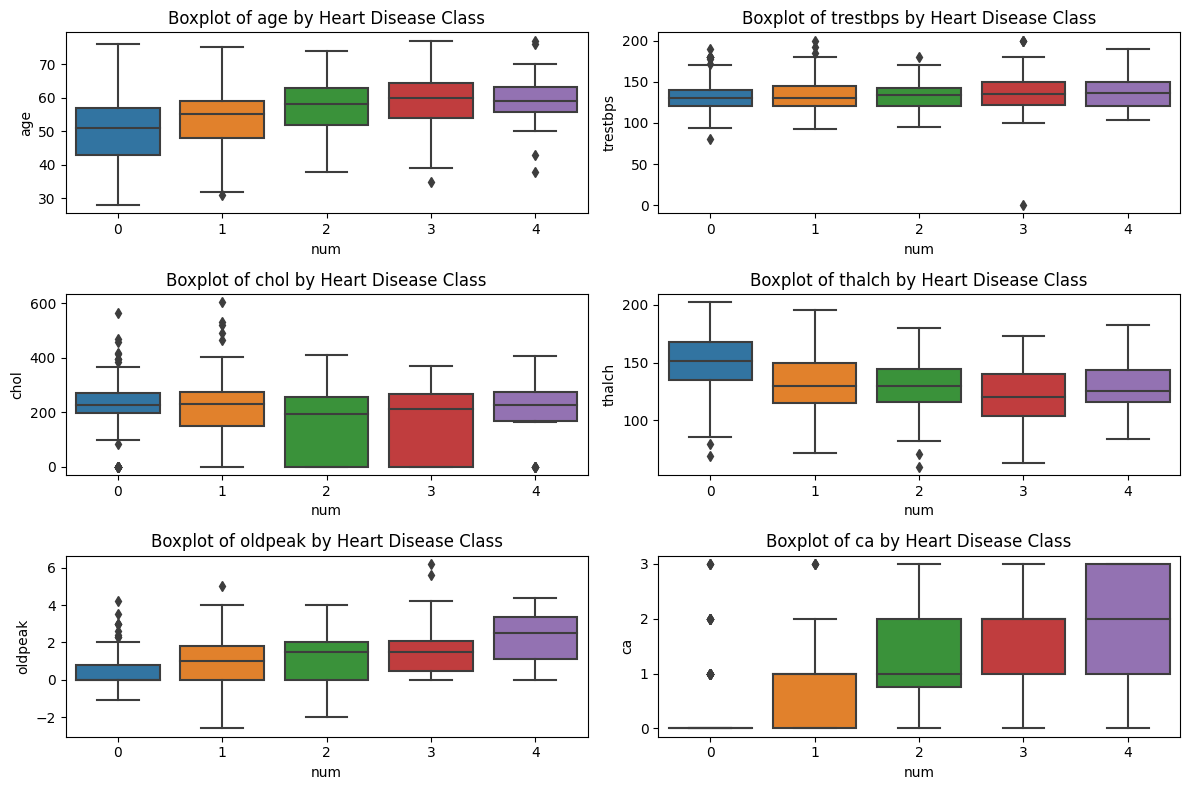

In [11]:
plt.figure(figsize=(12, 8))

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('num')  

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)  
    sns.boxplot(data=df, y=column, x='num')
    plt.title(f'Boxplot of {column} by Heart Disease Class')

plt.tight_layout()  
plt.show()

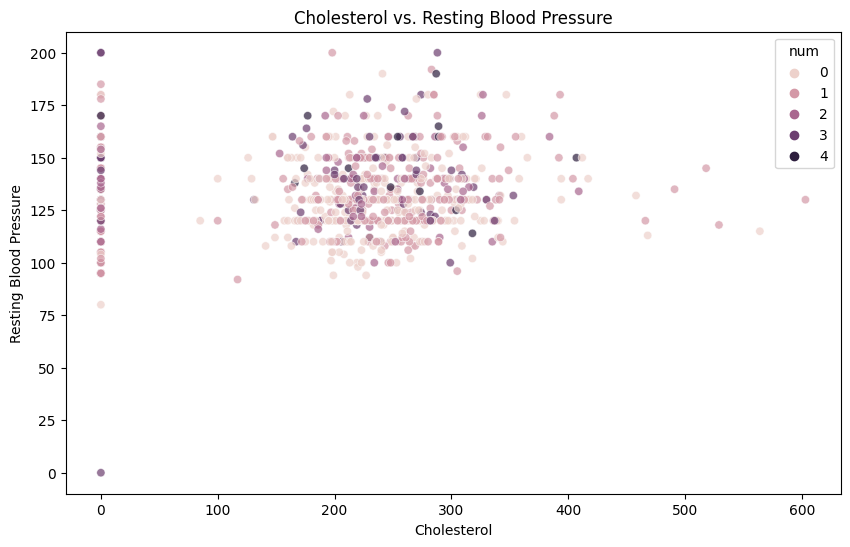

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='chol', y='trestbps', hue='num', alpha=0.7)
plt.title('Cholesterol vs. Resting Blood Pressure')
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.show()

In [13]:
def missing_data_analysis(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    return missing_data

missing_data = missing_data_analysis(df)
print(missing_data)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64


In [14]:
summary_stats = df.groupby('num').agg(['mean', 'std', 'count']).T
print(summary_stats)

num                      0           1           2           3           4
age      mean    50.547445   53.528302   57.577982   59.214953   59.214286
         std      9.433700    8.740371    7.786852    7.990594    8.283661
         count  411.000000  265.000000  109.000000  107.000000   28.000000
trestbps mean   129.913043  132.861111  133.613861  136.152174  138.720000
         std     16.869867   19.848444   17.295069   24.842774   22.193317
         count  391.000000  252.000000  101.000000   92.000000   25.000000
chol     mean   227.905612  195.255814  143.859813  159.716981  192.148148
         std     75.832760  124.171544  131.600915  126.804894  116.627845
         count  392.000000  258.000000  107.000000  106.000000   27.000000
fbs      mean     0.110831    0.173333    0.261364    0.287234    0.192308
         std      0.314319    0.379379    0.441896    0.454898    0.401918
         count  397.000000  225.000000   88.000000   94.000000   26.000000
thalch   mean   148.80051

In [15]:
df.drop(columns=["ca"], inplace=True)

In [16]:
df["trestbps"].fillna(df["trestbps"].median(), inplace=True)
df["chol"].fillna(df["chol"].median(), inplace=True)
df["fbs"].fillna(df["fbs"].mode()[0], inplace=True)
df["restecg"].fillna(df["restecg"].mode()[0], inplace=True)
df["thalch"].fillna(df["thalch"].median(), inplace=True)
df["exang"].fillna(df["exang"].median(), inplace=True)
df["oldpeak"].fillna(df["oldpeak"].median(), inplace=True)
df["slope"].fillna(df["slope"].mode()[0], inplace=True)
df["thal"].fillna(df["thal"].mode()[0], inplace=True)

In [17]:
from scipy import stats

# T-Test
t_stat, p_value = stats.ttest_ind(df[df['num'] == 1]['chol'], df[df['num'] == 0]['chol'])
print(f'T-Test: t-statistic = {t_stat}, p-value = {p_value}')

# Mann-Whitney U Test
u_stat, p_value_mw = stats.mannwhitneyu(df[df['num'] == 1]['chol'], df[df['num'] == 0]['chol'])
print(f'Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value_mw}')

T-Test: t-statistic = -4.188353606481868, p-value = 3.183333070150167e-05
Mann-Whitney U Test: U-statistic = 50758.5, p-value = 0.13531179112928923


In [18]:
from scipy.stats import kruskal

grouped_data = [df[df['num'] == i]['age'] for i in df['num'].unique()]
h_stat, p_value = kruskal(*grouped_data)
print(f'Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_value}')

Kruskal-Wallis H-statistic: 116.04638079285563, p-value: 3.7313953779882895e-24


In [35]:
X = df.drop(["num"], axis=1)
y = df["num"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
cat_features = ["sex", "dataset", "cp", "exang", "slope", "restecg", "thal"]
num_features = ["age", "trestbps", "fbs", "chol", "oldpeak", "thalch"]

In [56]:
X_train_num = X_train[num_features]
X_test_num = X_test[num_features]

In [57]:
scaler = StandardScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [59]:
ohe = OneHotEncoder(sparse=False, drop="first")

In [60]:
X_train_cat = X_train[cat_features]
X_test_cat = X_test[cat_features]

In [61]:
X_train_encoded = ohe.fit_transform(X_train_cat)
X_test_encoded = ohe.transform(X_test_cat)

In [62]:
X_train.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
695,62,Male,Switzerland,asymptomatic,150.0,0.0,False,st-t abnormality,78.0,False,2.0,flat,reversable defect
521,55,Male,Hungary,asymptomatic,140.0,201.0,False,normal,130.0,True,3.0,flat,normal
7,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,normal
250,57,Male,Cleveland,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect
155,70,Male,Cleveland,asymptomatic,130.0,322.0,False,lv hypertrophy,109.0,False,2.4,flat,normal


In [63]:
X_train_scaled

array([[ 0.90309788,  0.99309267, -0.39468835, -1.81017538,  1.06644251,
        -2.35468966],
       [ 0.14462757,  0.45375072, -0.39468835,  0.02354792,  1.9947197 ,
        -0.29440081],
       [ 0.36133337, -0.62493317, -0.39468835,  1.41936715, -0.23314556,
         1.0130902 ],
       ...,
       [ 2.31168561,  1.53243462,  2.53364458,  1.01795509,  1.06644251,
        -1.00757772],
       [-0.07207823,  0.45375072, -0.39468835,  0.16039294,  1.06644251,
         0.18105047],
       [ 0.36133337, -0.19345961, -0.39468835,  0.95409408, -0.79011188,
         0.85460644]])

In [64]:
X_train_encoded

array([[1., 0., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [65]:
X_train = np.hstack((X_train_scaled, X_train_encoded))
X_test = np.hstack((X_test_scaled, X_test_encoded))

In [66]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier()

voting = VotingClassifier(estimators=[("rf",rf),("knn",knn)], voting="soft")

In [67]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  0.5608695652173913
Confusion Matrix:  [[78 12  5  1  0]
 [15 35  7  7  0]
 [ 4 13 10  4  0]
 [ 9 13  4  6  0]
 [ 1  1  2  3  0]]
Classification Report:                precision    recall  f1-score   support

           0       0.73      0.81      0.77        96
           1       0.47      0.55      0.51        64
           2       0.36      0.32      0.34        31
           3       0.29      0.19      0.23        32
           4       0.00      0.00      0.00         7

    accuracy                           0.56       230
   macro avg       0.37      0.37      0.37       230
weighted avg       0.52      0.56      0.54       230



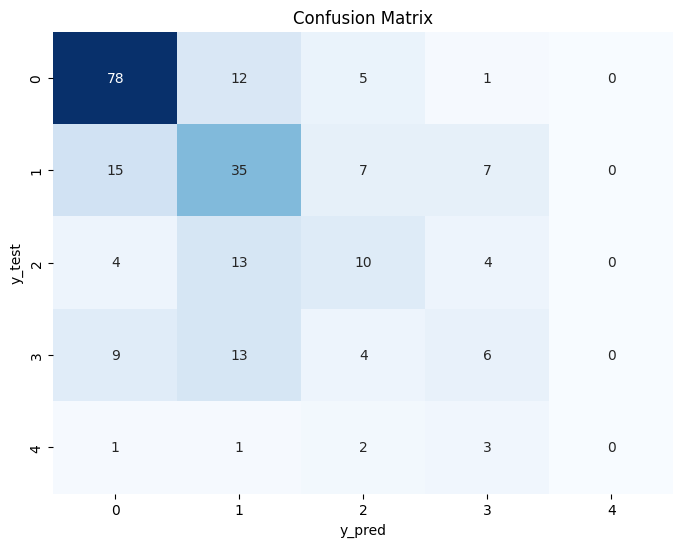

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()